In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
%matplotlib inline

In [2]:
#Import Given Data
data = pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#Checking null values in data
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#Eliminate null values
data.dropna(how = 'any',inplace = True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
ctext = data["Category"]
cint = data["Category"].unique()
cintlen = len(cint)
c_dict = {}
for i in range(0,cintlen):
    c_dict[cint[i]] = i
data["Category_New"] = data["Category"].map(c_dict).astype(int)

In [8]:
data["Reviews"] = data["Reviews"].astype(int)

In [9]:
def conversion(Size):
    if 'M' in Size:
        x = Size[:-1]
        x = float(x)*1000
        return x
    elif 'k' in Size:
        x = Size[:-1]
        x = float(x)
        return x
    else: return None
data["Size"] = data["Size"].map(conversion)

In [10]:
data.Size.fillna(method = 'pad', inplace = True)

In [11]:
data["Installs"] = data["Installs"].map(lambda x:x.replace(',','').replace('+','')).astype(int)

In [12]:
data["Price"] = data["Price"].map(lambda x:x.replace('$','')).astype(float)

In [13]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
 13  Category_New    9360 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_New
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [14]:
len(data[data["Rating"] > 5])

0

In [15]:
len(data[data["Reviews"] > data["Installs"]])

7

In [16]:
print(data["Reviews"])

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int64


In [17]:
data = data[data["Reviews"] < data["Installs"]].copy()

In [18]:
len(data[(data["Type"] == 'free') & (data["Price"] > 0)])

0

In [ ]:
plt.figure(figsize = (16,12))
sns.boxplot(data["Price"])
plt.show()

In [ ]:
plt.figure(figsize = (17,13))
sns.boxplot(data["Reviews"])
plt.show()

In [ ]:
data.hist(["Rating","Size"],figsize = (12,8), xlabelsize = 12, ylabelsize = 12)

In [22]:
#Outlier Treatment
max(data["Price"])
print(len(data[data["Price"] > 200]))
data = data[data["Price"] < 200].copy()

15


In [23]:
print(len(data[data["Reviews"] >= 2000000]))
data = data[data["Reviews"] <= 2000000].copy()

453


In [24]:
data["Installs"].quantile([0.10,0.25,0.50,0.70,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [25]:
len(data[data["Installs"] >= 10000000])
data = data[data["Installs"] <= 10000000].copy()

In [ ]:
#Bivariate Analysis
sns.set_style("darkgrid")
sns.scatterplot(data["Price"], data["Rating"], hue = data["Rating"])

In [ ]:
sns.scatterplot(data["Size"], data["Rating"], hue = data["Rating"])

In [ ]:
sns.scatterplot(data["Reviews"], data["Rating"], hue = data["Rating"])

In [ ]:
plt.figure(figsize = (10,6))
b = sns.boxplot(x = data["Content Rating"], y = data["Rating"])
b.set_xlabel("Content Rating", fontsize = 11)
b.set_ylabel("Rating", fontsize = 11)

Text(0, 0.5, 'Rating')

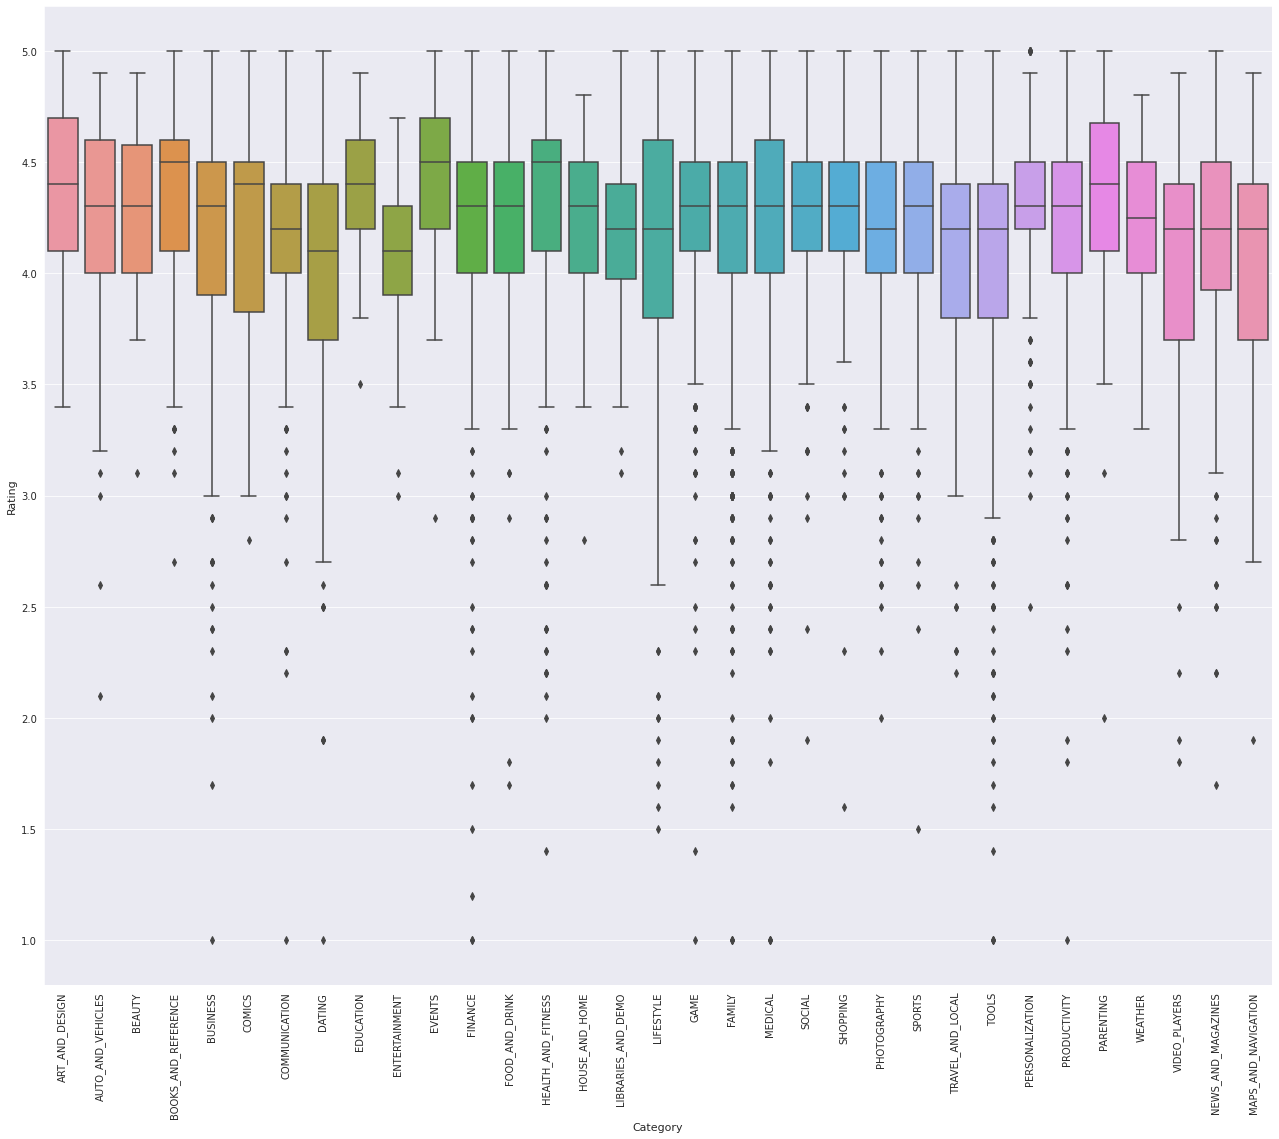

In [30]:
plt.figure(figsize = (22,18))
b = sns.boxplot(x = data["Category"], y = data["Rating"])
b.set_xlabel("Category", fontsize = 11)
b.set_xticklabels(b.get_xticklabels(), rotation = 90)
b.set_ylabel("Rating", fontsize = 11)

In [31]:
data["Reviews"] = data["Reviews"].apply(func = np.log1p)
data["Installs"] = data["Installs"].apply(func = np.log1p)

In [32]:
data.drop(labels = ["App", "Last Updated", "Current Ver", "Android Ver"], axis = 1, inplace = True)

In [ ]:
inp2 = pd.get_dummies(data, drop_first = True)
inp2.head()

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
x = inp2.iloc[:, 1:].values
y = inp2.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
x_train.shape, x_test.shape

((5945, 157), (2549, 157))

In [36]:
fit = model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [37]:
y_test = np.array(y_test)
predicted = np.array(prediction)

In [38]:
result =pd.DataFrame({'True Value':y_test.flatten(),'Predicted Value':predicted.flatten()})
result.head()

,True Value,Predicted Value
0,4.3,4.225006
1,4.1,3.801287
2,4.7,4.507550
3,4.8,4.310535
4,4.5,4.015054


In [39]:
print("R2",r2_score(y_test, predicted))
print("Mean Square Error", mean_squared_error(y_test, predicted))

R2 0.15056791895387045
Mean Square Error 0.24296969838574323


In [ ]:
from statsmodels.api import OLS
results=OLS(y_train,x_train).fit()
results.summary()